In [2]:
# Import all required libraries
# Read csv the dataframe
# Inspect the dataframe and clean if required
# Make new dataframe with selected feature columns
# Scale the features
# Test train split (Randon seed, shuffle, stratify)
# Create KNN model and fit the training data
# Predict the test data
# Evaluate the model using recall and precision. Present a confusion matrix.
# Perform cross validation with 5 folds and report average recall and precision
# Perform hyperparameter tuning using GridSearchCV for n_neighbors from 1 to 20
# Create a pipeline including scaling and KNN model
# Add visualisations


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [8]:
ttc_initial=pd.read_csv("C:/Users/sonus/OneDrive/Desktop/DSI/Rohan Kulkarni/Final Project/ml13-ttc-delays-project/src_files/ttc_delays_final_df.csv")

In [ ]:
ttc_initial.head()

,date,year,month,day_of_month,weekday_num,time,hour,minute,day,day_of_week,...,delay_category,min_delay,location_bound,line,major_delay_flag,rush_hour_flag,controllable_delay_flag,season,major_event_flag,major_event_desc
0,2014-01-01,2014,1,1,3,00:21,0,21,Wednesday,3,...,Passenger,55,W,BD,1,0,0,Winter,0,NaN
1,2014-01-01,2014,1,1,3,02:06,2,6,Wednesday,3,...,Passenger,3,W,BD,0,0,0,Winter,0,NaN
2,2014-01-01,2014,1,1,3,03:10,3,10,Wednesday,3,...,Passenger,3,W,BD,0,0,0,Winter,0,NaN
3,2014-01-01,2014,1,1,3,03:20,3,20,Wednesday,3,...,Passenger,5,S,YU,0,0,1,Winter,0,NaN
4,2014-01-01,2014,1,1,3,08:48,8,48,Wednesday,3,...,Staff,5,E,BD,0,1,1,Winter,0,NaN


In [9]:
# Select features and target variable and create new dataframe
# month	day_of_month	hour	day_of_week	delay_category	line	major_delay_flag

ttc=ttc_initial[['month','day_of_month','weekday_num','hour','day_of_week','delay_category','line','rush_hour_flag','season','major_delay_flag']]

In [10]:
ttc.head()

,month,day_of_month,weekday_num,hour,day_of_week,delay_category,line,rush_hour_flag,season,major_delay_flag
0,1,1,3,0,3,Passenger,BD,0,Winter,1
1,1,1,3,2,3,Passenger,BD,0,Winter,0
2,1,1,3,3,3,Passenger,BD,0,Winter,0
3,1,1,3,3,3,Passenger,YU,0,Winter,0
4,1,1,3,8,3,Staff,BD,1,Winter,0


In [11]:
# One-hot encode categorical variables
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['delay_category', 'line', 'season']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(ttc[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)
ttc_encoded = pd.concat([ttc.drop(columns=['delay_category', 'line', 'season']), encoded_df], axis=1)
ttc_encoded

,month,day_of_month,weekday_num,hour,day_of_week,rush_hour_flag,major_delay_flag,delay_category_Passenger,delay_category_Staff,delay_category_Technical,delay_category_Weather,line_SHP,line_YU,season_Spring,season_Summer,season_Winter
0,1,1,3,0,3,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,3,2,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,3,3,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,3,3,3,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,1,3,8,3,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75499,9,30,2,20,2,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
75500,9,30,2,20,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75501,9,30,2,20,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75502,9,30,2,21,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Feature Scaling

# Create a copy of the original 'ttc' dataframe to ensure we're not modifying the original data
standardized_ttc = ttc_encoded.copy()

# Specify the columns that we do NOT want to scale
columns_to_exclude = ['rush_hour_flag','delay_category_Passenger','delay_category_Staff','delay_category_Technical','delay_category_Weather','delay_category_Weather','line_SHP','line_YU','season_Spring','season_Summer','season_Winter','major_delay_flag']

# Select the columns that we want to scale by excluding the 'id' and 'diagnosis' columns
# This will return a list of the numeric columns we need to scale
columns_to_scale = standardized_ttc.columns.difference(columns_to_exclude)

# Initialize the StandardScaler to standardize the selected numeric columns
scaler = StandardScaler()

# Apply the scaler to the selected columns. This transforms the data so that each feature
# has a mean of 0 and a standard deviation of 1, which is essential to prevent larger
# scale features from dominating the analysis, especially for distance-based algorithms like KNN.
standardized_ttc[columns_to_scale] = scaler.fit_transform(ttc[columns_to_scale])

# Output the standardized dataframe with the scaled numeric columns
standardized_ttc


,month,day_of_month,weekday_num,hour,day_of_week,rush_hour_flag,major_delay_flag,delay_category_Passenger,delay_category_Staff,delay_category_Technical,delay_category_Weather,line_SHP,line_YU,season_Spring,season_Summer,season_Winter
0,-1.519599,-1.683939,-0.031463,-2.142370,-0.031463,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.519599,-1.683939,-0.031463,-1.813028,-0.031463,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.519599,-1.683939,-0.031463,-1.648357,-0.031463,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.519599,-1.683939,-0.031463,-1.648357,-0.031463,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.519599,-1.683939,-0.031463,-0.825001,-0.031463,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75499,0.781520,1.607590,-0.562198,1.151054,-0.562198,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
75500,0.781520,1.607590,-0.562198,1.151054,-0.562198,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75501,0.781520,1.607590,-0.562198,1.151054,-0.562198,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75502,0.781520,1.607590,-0.562198,1.315725,-0.562198,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
standardized_ttc["major_delay_flag"].value_counts(normalize=True)

major_delay_flag
0    0.84577
1    0.15423
Name: proportion, dtype: float64

In [ ]:
#set the seed
np.random.seed(1)
#split the data
standardized_ttc_train, standardized_ttc_test = train_test_split(standardized_ttc, test_size=0.25, random_state=42, shuffle=True, stratify=standardized_ttc['major_delay_flag'])

In [24]:
standardized_ttc_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56628 entries, 43655 to 52367
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   month                     56628 non-null  float64
 1   day_of_month              56628 non-null  float64
 2   weekday_num               56628 non-null  float64
 3   hour                      56628 non-null  float64
 4   day_of_week               56628 non-null  float64
 5   rush_hour_flag            56628 non-null  int64  
 6   major_delay_flag          56628 non-null  int64  
 7   delay_category_Passenger  56628 non-null  float64
 8   delay_category_Staff      56628 non-null  float64
 9   delay_category_Technical  56628 non-null  float64
 10  delay_category_Weather    56628 non-null  float64
 11  line_SHP                  56628 non-null  float64
 12  line_YU                   56628 non-null  float64
 13  season_Spring             56628 non-null  float64
 14  season_

In [25]:
standardized_ttc_train["major_delay_flag"].value_counts(normalize=True)

major_delay_flag
0    0.845765
1    0.154235
Name: proportion, dtype: float64

In [26]:
knn = KNeighborsClassifier()

In [27]:
parameter_grid = {
    "n_neighbors": range(1, 200, 20),
}

In [28]:
standardized_ttc_tune_grid = GridSearchCV(
    estimator=knn,
    param_grid=parameter_grid,
    cv=10
)

In [29]:
standardized_ttc_tune_grid.fit(
    standardized_ttc_train.drop(columns=["major_delay_flag"]),
    standardized_ttc_train["major_delay_flag"]
)

accuracies_grid = pd.DataFrame(standardized_ttc_tune_grid.cv_results_)
accuracies_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.130144,0.005394,0.168815,0.006434,1,{'n_neighbors': 1},0.758432,0.750486,0.755077,0.751015,0.762317,0.749956,0.760021,0.760021,0.758919,0.756800,0.756304,0.004231,10
1,0.132231,0.008707,0.413673,0.017895,21,{'n_neighbors': 21},0.844076,0.843193,0.843899,0.843369,0.844429,0.843369,0.843722,0.845488,0.844931,0.845108,0.844158,0.000760,9
2,0.134917,0.007078,0.550683,0.017196,41,{'n_neighbors': 41},0.845665,0.845841,0.845841,0.846018,0.845841,0.845135,0.845488,0.845841,0.846344,0.845638,0.845765,0.000304,2
3,0.157939,0.076859,0.806037,0.413638,61,{'n_neighbors': 61},0.846018,0.845665,0.845841,0.846018,0.845665,0.845841,0.845841,0.845665,0.845991,0.845814,0.845836,0.000134,1
4,0.204767,0.091917,1.158286,0.657183,81,{'n_neighbors': 81},0.845841,0.845841,0.845841,0.845841,0.845665,0.845665,0.845665,0.845665,0.845814,0.845814,0.845765,0.000083,3
5,0.135638,0.006381,0.812345,0.015396,101,{'n_neighbors': 101},0.845841,0.845841,0.845841,0.845841,0.845665,0.845665,0.845665,0.845665,0.845814,0.845814,0.845765,0.000083,3
6,0.138943,0.007358,0.941011,0.038940,121,{'n_neighbors': 121},0.845841,0.845841,0.845841,0.845841,0.845665,0.845665,0.845665,0.845665,0.845814,0.845814,0.845765,0.000083,3
7,0.128666,0.008475,0.957498,0.044499,141,{'n_neighbors': 141},0.845841,0.845841,0.845841,0.845841,0.845665,0.845665,0.845665,0.845665,0.845814,0.845814,0.845765,0.000083,3
8,0.132707,0.007080,1.023705,0.048036,161,{'n_neighbors': 161},0.845841,0.845841,0.845841,0.845841,0.845665,0.845665,0.845665,0.845665,0.845814,0.845814,0.845765,0.000083,3
9,0.138084,0.006970,1.144464,0.030776,181,{'n_neighbors': 181},0.845841,0.845841,0.845841,0.845841,0.845665,0.845665,0.845665,0.845665,0.845814,0.845814,0.845765,0.000083,3


In [30]:
standardized_ttc_tune_grid.best_params_

{'n_neighbors': 61}

In [31]:
knn = KNeighborsClassifier(n_neighbors=61)

In [32]:
standardized_ttc_train.head()

,month,day_of_month,weekday_num,hour,day_of_week,rush_hour_flag,major_delay_flag,delay_category_Passenger,delay_category_Staff,delay_category_Technical,delay_category_Weather,line_SHP,line_YU,season_Spring,season_Summer,season_Winter
43655,-1.519599,0.018576,-1.623669,-0.330987,-1.623669,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1188,-0.944319,-1.456937,-1.092934,-0.825001,-1.092934,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
22904,1.644439,-0.208426,1.030008,-0.825001,1.030008,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2862,-0.081400,0.245578,-0.031463,0.986383,-0.031463,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
53980,-0.656679,0.132077,-1.092934,-0.825001,-1.092934,1,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [33]:
feature_cols = standardized_ttc_train.drop(columns=['major_delay_flag'])

In [34]:
feature_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56628 entries, 43655 to 52367
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   month                     56628 non-null  float64
 1   day_of_month              56628 non-null  float64
 2   weekday_num               56628 non-null  float64
 3   hour                      56628 non-null  float64
 4   day_of_week               56628 non-null  float64
 5   rush_hour_flag            56628 non-null  int64  
 6   delay_category_Passenger  56628 non-null  float64
 7   delay_category_Staff      56628 non-null  float64
 8   delay_category_Technical  56628 non-null  float64
 9   delay_category_Weather    56628 non-null  float64
 10  line_SHP                  56628 non-null  float64
 11  line_YU                   56628 non-null  float64
 12  season_Spring             56628 non-null  float64
 13  season_Summer             56628 non-null  float64
 14  season_

In [35]:
knn.fit(X= feature_cols  , y= standardized_ttc_train["major_delay_flag"])

KNeighborsClassifier(n_neighbors=61)

In [36]:
feature_cols_2  = standardized_ttc_test.drop(columns=['major_delay_flag'])

In [37]:
knn.feature_names_in_

array(['month', 'day_of_month', 'weekday_num', 'hour', 'day_of_week',
       'rush_hour_flag', 'delay_category_Passenger',
       'delay_category_Staff', 'delay_category_Technical',
       'delay_category_Weather', 'line_SHP', 'line_YU', 'season_Spring',
       'season_Summer', 'season_Winter'], dtype=object)

In [38]:
X_test = standardized_ttc_test[knn.feature_names_in_]

In [39]:
standardized_ttc_test["predicted"] = knn.predict(X_test)
standardized_ttc_test

,month,day_of_month,weekday_num,hour,day_of_week,rush_hour_flag,major_delay_flag,delay_category_Passenger,delay_category_Staff,delay_category_Technical,delay_category_Weather,line_SHP,line_YU,season_Spring,season_Summer,season_Winter,predicted
10301,1.644439,0.813083,-0.031463,-0.989672,-0.031463,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
15169,1.356799,1.494089,-0.562198,-0.825001,-0.562198,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
27235,0.493880,-0.321927,-0.562198,-0.495658,-0.562198,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
33588,0.206240,0.132077,1.030008,-0.660329,1.030008,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
7733,-0.369039,1.607590,1.560744,-0.330987,1.560744,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66119,0.781520,0.132077,-0.562198,-0.825001,-0.562198,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
19794,-0.081400,1.494089,1.030008,1.151054,1.030008,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
56885,0.781520,-1.116434,-0.031463,0.327698,-0.031463,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
73539,0.206240,-1.456937,0.499273,-0.330987,0.499273,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [40]:
standardized_ttc_test[["major_delay_flag", "predicted"]]

,major_delay_flag,predicted
10301,0,0
15169,0,0
27235,0,0
33588,0,0
7733,0,0
...,...,...
66119,0,0
19794,0,0
56885,0,0
73539,0,0


In [41]:
knn.score(
    X_test,
    y= standardized_ttc_test["major_delay_flag"]
)

0.8457300275482094

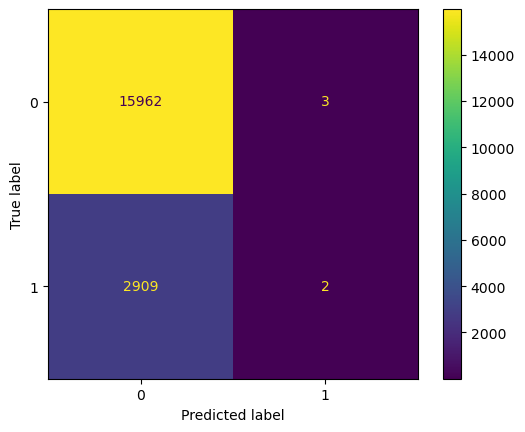

In [42]:
# Create a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    knn,
    X_test,
    standardized_ttc_test["major_delay_flag"]
)

In [44]:
from sklearn.ensemble import RandomForestClassifier

# 1. Build X_train and y_train
feature_cols = knn.feature_names_in_   # or whatever you used before

X_train = standardized_ttc_train[feature_cols]
y_train = standardized_ttc_train["major_delay_flag"]

# 2. Fit Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 3. Build feature importance table
rf_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

rf_importance.head(40)


,feature,importance
1,day_of_month,0.417576
3,hour,0.260238
0,month,0.118100
4,day_of_week,0.044095
2,weekday_num,0.043993
11,line_YU,0.027797
6,delay_category_Passenger,0.027397
7,delay_category_Staff,0.011389
8,delay_category_Technical,0.010542
10,line_SHP,0.008602


In [45]:
X_test = standardized_ttc_test[feature_cols]
y_test = standardized_ttc_test["major_delay_flag"]

In [46]:
rf.score(X_test, y_test)

0.8095465140919686

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = rf.predict(X_test)
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Confusion Matrix: [[14944  1021]
 [ 2574   337]]
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.94      0.89     15965
           1       0.25      0.12      0.16      2911

    accuracy                           0.81     18876
   macro avg       0.55      0.53      0.53     18876
weighted avg       0.76      0.81      0.78     18876



Considering that the model does a bad job at predicting a delay from test data, we shall take a closer look at the features.
The original model contains 15 variables.
From the feature importance table (obtained by running Random Forest), we can reduce the number of features.

In [49]:
standardized_ttc.head()

,month,day_of_month,weekday_num,hour,day_of_week,rush_hour_flag,major_delay_flag,delay_category_Passenger,delay_category_Staff,delay_category_Technical,delay_category_Weather,line_SHP,line_YU,season_Spring,season_Summer,season_Winter
0,-1.519599,-1.683939,-0.031463,-2.142370,-0.031463,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.519599,-1.683939,-0.031463,-1.813028,-0.031463,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.519599,-1.683939,-0.031463,-1.648357,-0.031463,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.519599,-1.683939,-0.031463,-1.648357,-0.031463,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.519599,-1.683939,-0.031463,-0.825001,-0.031463,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Create new df for selected features based on feature importance
new_features = standardized_ttc[['month','hour','weekday_num','major_delay_flag']]
new_features.head()


,month,day_of_month,hour,weekday_num,major_delay_flag
0,-1.519599,-1.683939,-2.142370,-0.031463,1
1,-1.519599,-1.683939,-1.813028,-0.031463,0
2,-1.519599,-1.683939,-1.648357,-0.031463,0
3,-1.519599,-1.683939,-1.648357,-0.031463,0
4,-1.519599,-1.683939,-0.825001,-0.031463,0


In [97]:
# New features df is already standardized and ready for modelling
# set the seed
np.random.seed(1)
#split the data
new_features_train, new_features_test = train_test_split(new_features, test_size=0.25, random_state=42, shuffle=True, stratify=standardized_ttc['major_delay_flag'])

In [98]:
knn_new = KNeighborsClassifier(n_neighbors=50)
knn_new.fit(X=new_features_train[['month','hour','weekday_num']], y=new_features_train["major_delay_flag"])

KNeighborsClassifier(n_neighbors=50)

In [ ]:
new_features_test["predicted"] = knn_new.predict(new_features_test[['month','hour','weekday_num']])
new_features_test[["major_delay_flag", "predicted"]]

,major_delay_flag,predicted
10301,0,0
15169,0,0
27235,0,0
33588,0,0
7733,0,0
...,...,...
66119,0,0
19794,0,0
56885,0,0
73539,0,0


In [ ]:
# Examine accuracy of the revised model
knn_new.score(
    new_features_test[['month','hour','weekday_num']],
    new_features_test["major_delay_flag"]
)

0.845783004873914

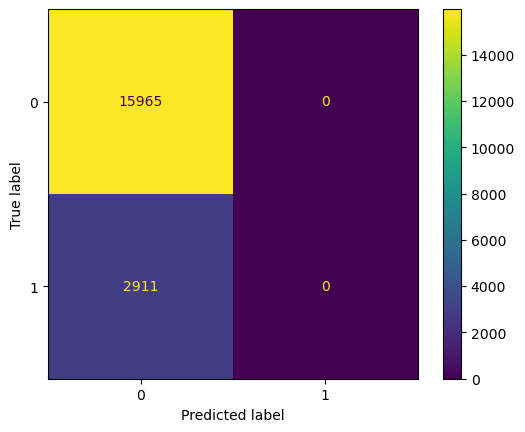

In [99]:
# Confusion matrix for the revised model
ConfusionMatrixDisplay.from_estimator(
    knn_new,
    new_features_test[['month','hour','weekday_num']],
    new_features_test["major_delay_flag"]
)   

The results are sub par, and we need to experiment further with features and output variable.